In [1]:
import pandas as pd
import numpy as np

offical_trainX = pd.read_csv("./data/dengue_features_train.csv")
offical_trainY = pd.read_csv("./data/dengue_labels_train.csv")
offical_trainX.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [2]:
def rolling_dataframe_baby(df, n=2):
    city = df.loc[:,'city']
    # print(city)
    df_rolled = df.rolling(n).mean()
    df_rolled.loc[:,'year'] = df.loc[:,'year']
    df_rolled.loc[:,'weekofyear'] = df.loc[:,'weekofyear']
    df_rolled.insert(0, 'city', city)
    return df_rolled


offical_trainX = rolling_dataframe_baby(offical_trainX, n=2)
offical_trainX.head()


/var/folders/9q/5d2wg0rx1z5_sm6q_hs8ry940000gn/T/ipykernel_75998/407597870.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['city', 'week_start_date'], dtype='object')
  df_rolled = df.rolling(n).mean()
/var/folders/9q/5d2wg0rx1z5_sm6q_hs8ry940000gn/T/ipykernel_75998/407597870.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_rolled.loc[:,'year'] = df.loc[:,'year']
/var/folders/9q/5d2wg0rx1z5_sm6q_hs8ry940000gn/T/ipykernel_75998/407597870.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the o

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sj,1990,19,0.146250,0.122950,0.180420,0.166551,17.62,297.892143,298.092857,...,24.97,75.367143,17.62,14.692857,2.500000,26.078571,6.635714,30.55,21.10,12.3
2,sj,1990,20,0.101075,0.157571,0.159779,0.163164,28.68,298.496429,298.660714,...,22.02,79.710714,28.68,16.110714,2.335714,26.714286,6.428571,31.95,22.50,25.0
3,sj,1990,21,0.080442,0.209017,0.192379,0.203364,24.95,298.884286,299.053571,...,20.00,81.195000,24.95,16.760714,2.364286,27.092857,6.628571,32.75,23.05,22.7
4,sj,1990,22,0.162417,0.253633,0.239379,0.241613,11.44,299.252857,299.446429,...,13.05,80.398571,11.44,16.941429,2.721429,28.207143,8.071429,34.15,23.60,4.9


In [3]:
offical_trainY
offical_trainX

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sj,1990,19,0.146250,0.122950,0.180420,0.166551,17.620,297.892143,298.092857,...,24.970,75.367143,17.620,14.692857,2.500000,26.078571,6.635714,30.55,21.10,12.30
2,sj,1990,20,0.101075,0.157571,0.159779,0.163164,28.680,298.496429,298.660714,...,22.020,79.710714,28.680,16.110714,2.335714,26.714286,6.428571,31.95,22.50,25.00
3,sj,1990,21,0.080442,0.209017,0.192379,0.203364,24.950,298.884286,299.053571,...,20.000,81.195000,24.950,16.760714,2.364286,27.092857,6.628571,32.75,23.05,22.70
4,sj,1990,22,0.162417,0.253633,0.239379,0.241613,11.440,299.252857,299.446429,...,13.050,80.398571,11.440,16.941429,2.721429,28.207143,8.071429,34.15,23.60,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,0.302911,0.295700,0.257307,0.268507,28.225,298.491429,299.739286,...,26.900,83.882143,28.225,16.697143,10.521429,27.133333,10.566667,34.70,21.20,14.75
1452,iq,2010,22,0.251454,0.239636,0.196193,0.259086,70.885,298.832143,300.082143,...,126.050,90.182857,70.885,18.277857,8.635714,28.033333,11.216667,35.05,22.05,31.80
1453,iq,2010,23,0.203607,0.153214,0.193200,0.229686,72.705,297.464286,298.492857,...,128.850,92.940000,72.705,17.539286,7.485714,25.916667,8.700000,33.45,20.45,22.00
1454,iq,2010,24,0.290486,0.195914,0.264621,0.279600,59.305,296.472143,297.557143,...,56.465,94.470000,59.305,16.912143,7.685714,24.916667,7.816667,31.70,20.10,11.70


In [4]:
### generating train test 
pop_sj = 23.50000 # to normalized per 100 000 inhabitants
pop_iq = 5.10000 # to normalized per 100 000 inhabitants

sj_official_trainX= offical_trainX[offical_trainX.city == "sj"]
iq_official_trainX= offical_trainX[offical_trainX.city == "iq"]

sj_len_X=len(sj_official_trainX)
iq_len_X=len(iq_official_trainX)

sj_trainX=sj_official_trainX[:749]
iq_trainX=iq_official_trainX[:416]

sj_testX=sj_official_trainX[749:]
iq_testX=iq_official_trainX[416:]

sj_official_trainY = offical_trainY[offical_trainY.city == "sj"]
iq_official_trainY = offical_trainY[offical_trainY.city == "iq"]

sj_len_Y=len(sj_official_trainY)
iq_len_Y=len(sj_official_trainY)

sj_trainY=sj_official_trainY[:749]
iq_trainY=iq_official_trainY[:416]

sj_testY=sj_official_trainY[749:]
iq_testY=iq_official_trainY[416:]



trainX = pd.concat((sj_trainX, iq_trainX), axis=0)
trainY = pd.concat((sj_trainY, iq_trainY), axis=0)
testX = pd.concat((sj_testX, iq_testX), axis=0)
testY = pd.concat((sj_testY, iq_testY), axis=0)

trainX.head()


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sj,1990,19,0.146250,0.122950,0.180420,0.166551,17.62,297.892143,298.092857,...,24.97,75.367143,17.62,14.692857,2.500000,26.078571,6.635714,30.55,21.10,12.3
2,sj,1990,20,0.101075,0.157571,0.159779,0.163164,28.68,298.496429,298.660714,...,22.02,79.710714,28.68,16.110714,2.335714,26.714286,6.428571,31.95,22.50,25.0
3,sj,1990,21,0.080442,0.209017,0.192379,0.203364,24.95,298.884286,299.053571,...,20.00,81.195000,24.95,16.760714,2.364286,27.092857,6.628571,32.75,23.05,22.7
4,sj,1990,22,0.162417,0.253633,0.239379,0.241613,11.44,299.252857,299.446429,...,13.05,80.398571,11.44,16.941429,2.721429,28.207143,8.071429,34.15,23.60,4.9


In [5]:
#check data alignment
np.corrcoef(np.array(trainX.weekofyear), np.array(trainY.iloc[:,2]))

array([[1., 1.],
       [1., 1.]])

In [6]:
#check duplicates
print(f' trainX duplicates? {trainX.duplicated().unique()}')
print(f' trainY duplicates? {trainY.duplicated().unique()}')

 trainX duplicates? [False]
 trainY duplicates? [False]


In [7]:
sj_trainY

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
744,sj,2004,34,14
745,sj,2004,35,7
746,sj,2004,36,14
747,sj,2004,37,10


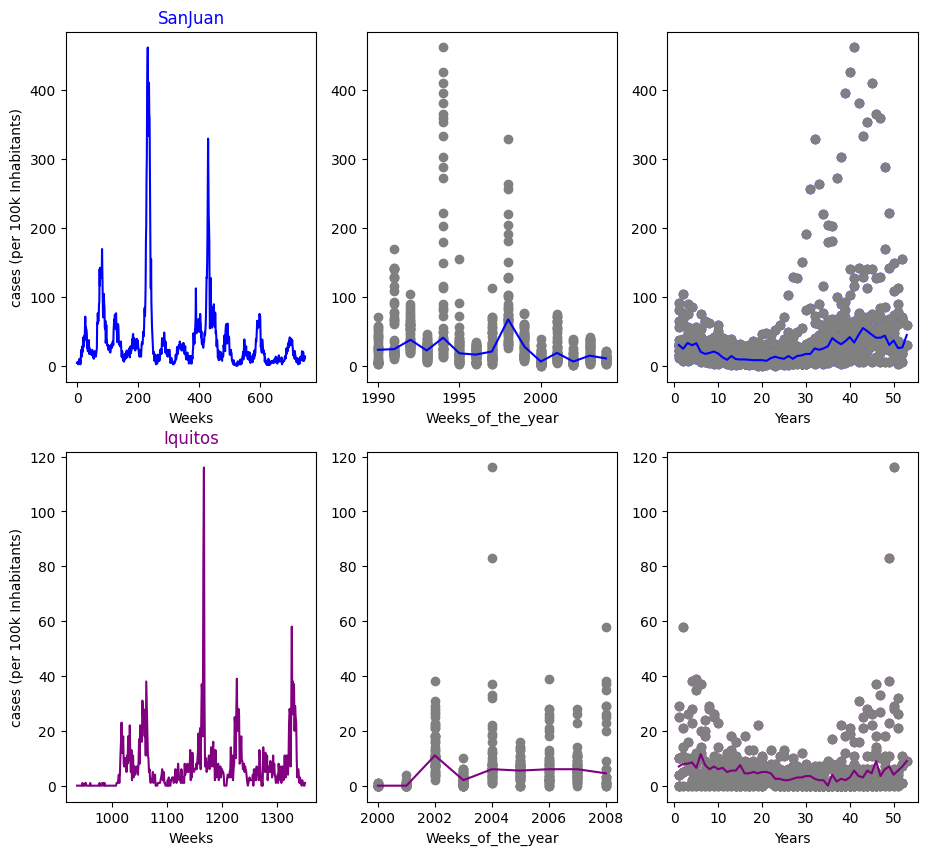

In [8]:
#how did the epidemic evolved over time
#separate plots by city
#numbers normalized by 100k inhabitants

import matplotlib.pyplot as plt
#pop_sj = 23.50000 # to normalized per 100 000 inhabitants
#pop_iq = 5.10000 # to normalized per 100 000 inhabitants
pop_sj = 1 # to normalized per 100 000 inhabitants
pop_iq = 1 # to normalized per 100 000 inhabitants
pops = [pop_sj, pop_iq]
cities = ['SanJuan', 'Iquitos']
cities_data = dict(SanJuan=sj_trainY, Iquitos=iq_trainY)
axes_cit = [[0, 0], [1,0]]
cities_color = ['blue', 'purple']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(11, 10))
for ct in range(len(cities)):
    thisrow = axes_cit[ct][0]
    thiscol = axes_cit[ct][1]
    axs[thisrow, 0].plot(
        cities_data[cities[ct]].iloc[:,3]/pops[ct],
        color=cities_color[ct])

    #plot for the all duration
    axs[thisrow, 2].scatter(
        cities_data[cities[ct]].loc[:,'weekofyear'],
        cities_data[cities[ct]].loc[:,'total_cases']/pops[ct],
        marker='o',
        color=cities_color[ct])

    #plot per year
    axs[thisrow, 1].scatter(
        cities_data[cities[ct]].iloc[:,1],
        cities_data[cities[ct]].iloc[:,3]/pops[ct],
        marker='o',
        color='grey')
    axs[thisrow, 1].plot(
        cities_data[cities[ct]].groupby('year')['total_cases'].median().index,
        cities_data[cities[ct]].groupby('year')['total_cases'].median()/pops[ct], 
        color=cities_color[ct])
    
    #plot per week of the year
    axs[thisrow, 2].scatter(
        cities_data[cities[ct]].loc[:,'weekofyear'],
        cities_data[cities[ct]].loc[:,'total_cases']/pops[ct],
        marker='o',
        color='grey')
    axs[thisrow, 2].plot(
        cities_data[cities[ct]].groupby('weekofyear')['total_cases'].median().index,
        cities_data[cities[ct]].groupby('weekofyear')['total_cases'].median()/pops[ct], 
        color=cities_color[ct])

    axs[thisrow, 0].set_ylabel('cases (per 100k Inhabitants)')
    axs[thisrow, 0].set_title(cities[ct], color=cities_color[ct])
    axs[thisrow, 0].set_xlabel('Weeks')
    axs[thisrow, 2].set_xlabel('Years')
    axs[thisrow, 1].set_xlabel('Weeks_of_the_year')   

plt.savefig('Epidemic_Evolution_0ver_time.png', orientation='landscape', transparent=False)


There is a clear yearly seasonality in San Juan but it is not as obvious in Iquitos \
Season clearly matters, the epidemics seems to vary with seasons (more in summer)

In [9]:
trainX.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1165.0,1999.517597,4.933309,1990.000000,1995.000000,2001.000000,2003.000000,2008.000000
weekofyear,1165.0,26.507296,14.888162,1.000000,14.000000,27.000000,39.000000,53.000000
ndvi_ne,888.0,0.163618,0.121744,-0.209100,0.068831,0.167567,0.267428,0.424279
ndvi_nw,1089.0,0.142553,0.100384,-0.190875,0.068550,0.139183,0.221843,0.387569
ndvi_se,1137.0,0.205977,0.059666,0.063358,0.163071,0.196921,0.243021,0.414661
ndvi_sw,1137.0,0.204009,0.069785,-0.042971,0.155561,0.190857,0.244157,0.495208
precipitation_amt_mm,1146.0,45.511880,34.954952,0.000000,18.016250,41.717500,65.755000,243.940000
reanalysis_air_temp_k,1150.0,298.636352,1.266261,295.222143,297.643214,298.568214,299.740714,301.255000
reanalysis_avg_temp_k,1150.0,299.161028,1.147135,295.900000,298.278571,299.239286,300.074107,302.264286
reanalysis_dew_point_temp_k,1150.0,295.187361,1.436410,290.320714,294.055000,295.593571,296.362321,297.480000


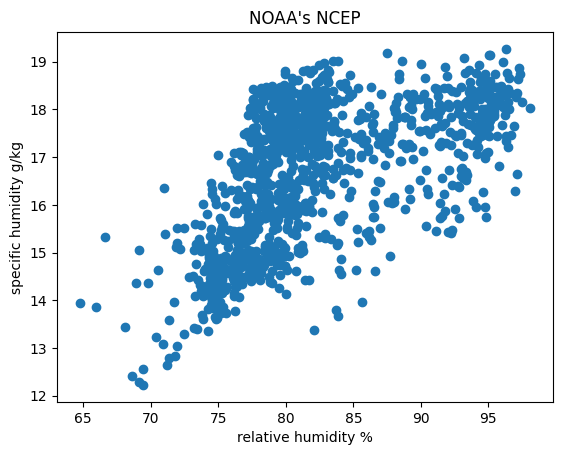

In [10]:
# humidity
plt.scatter(
    trainX.reanalysis_relative_humidity_percent, 
    trainX.reanalysis_specific_humidity_g_per_kg)
plt.xlabel('relative humidity %')
plt.ylabel('specific humidity g/kg')
plt.title("NOAA's NCEP")
plt.show()

In [11]:
#how many nans per columns
trainX.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  277
ndvi_nw                                   76
ndvi_se                                   28
ndvi_sw                                   28
precipitation_amt_mm                      19
reanalysis_air_temp_k                     15
reanalysis_avg_temp_k                     15
reanalysis_dew_point_temp_k               15
reanalysis_max_air_temp_k                 15
reanalysis_min_air_temp_k                 15
reanalysis_precip_amt_kg_per_m2           15
reanalysis_relative_humidity_percent      15
reanalysis_sat_precip_amt_mm              19
reanalysis_specific_humidity_g_per_kg     15
reanalysis_tdtr_k                         15
station_avg_temp_c                        64
station_diur_temp_rng_c                   64
station_max_temp_c                        25
station_min_temp_c                        23
station_pr

In [12]:
#getting rid of rows with nans
# trainX = trainX.dropna()
# trainY = trainY.loc[trainX.index]
# target = trainY.iloc[:,3]
# print(trainX.isnull().any().any())
# print(trainY.isnull().any().any())
# print(f'trainX shape: {trainX.shape} - trainY shape: {trainY.shape}')

In [13]:
data_select_col = ['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer 
from sklearn.impute import SimpleImputer, KNNImputer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns

all_numerical_features = trainX.select_dtypes(include = ['int64', 'float64']).columns
all_categorical_features = trainX.select_dtypes(include = [object, 'datetime64']).columns

numerical_features = [value for value in all_numerical_features if value in data_select_col]
categorical_features = [value for value in all_categorical_features if value in data_select_col]
categorical_features, numerical_features
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)), 
    ('scaler', StandardScaler())])
#Quantile encoding for categorical columns
#cat_enc = ce.count.CountEncoder()
# cat_enc = ce.QuantileEncoder()
# cat_enc = ce.hashing.HashingEncoder() ### NONONO 
# cat_enc = ce.james_stein.JamesSteinEncoder()
# cat_enc = ce.target_encoder.TargetEncoder()
cat_enc = ce.one_hot.OneHotEncoder()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', cat_enc)])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_features),
                  ('cat', categorical_transformer, categorical_features)], 
    remainder='passthrough' # to let everything not trasnformed go through
)

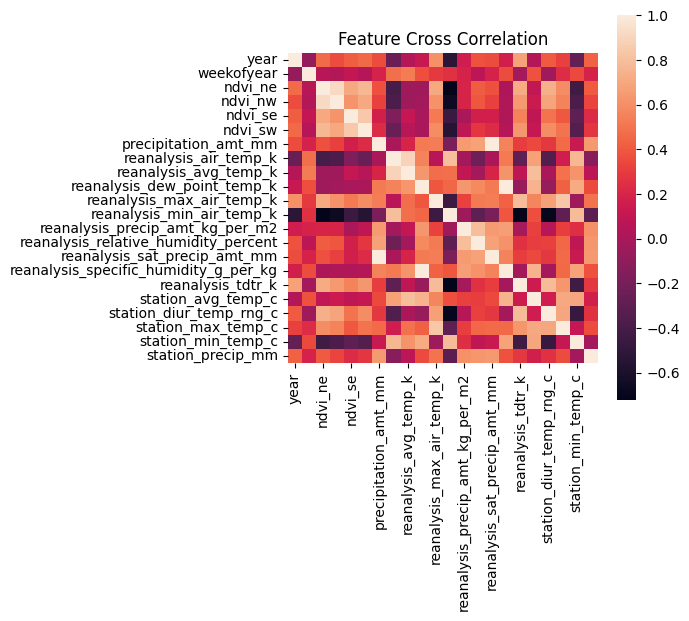

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
cc_map = sns.heatmap(trainX.corr(method='spearman',numeric_only=True), ax=ax)
# SellerG and CouncilArea are quite correlated
# Type and Room are quite correlated
ax.set_title('Feature Cross Correlation')
ax.set_aspect('equal')
plt.savefig('CrossCorrelationMatrix_AllNumFeatures.png', orientation='landscape', transparent=False)

plt.show()

RandomForestRegressor(max_depth=5, min_samples_split=100, n_estimators=300)
TRAIN - MAE =  15.615024163045309
TEST - MAE =  13.516082619793542


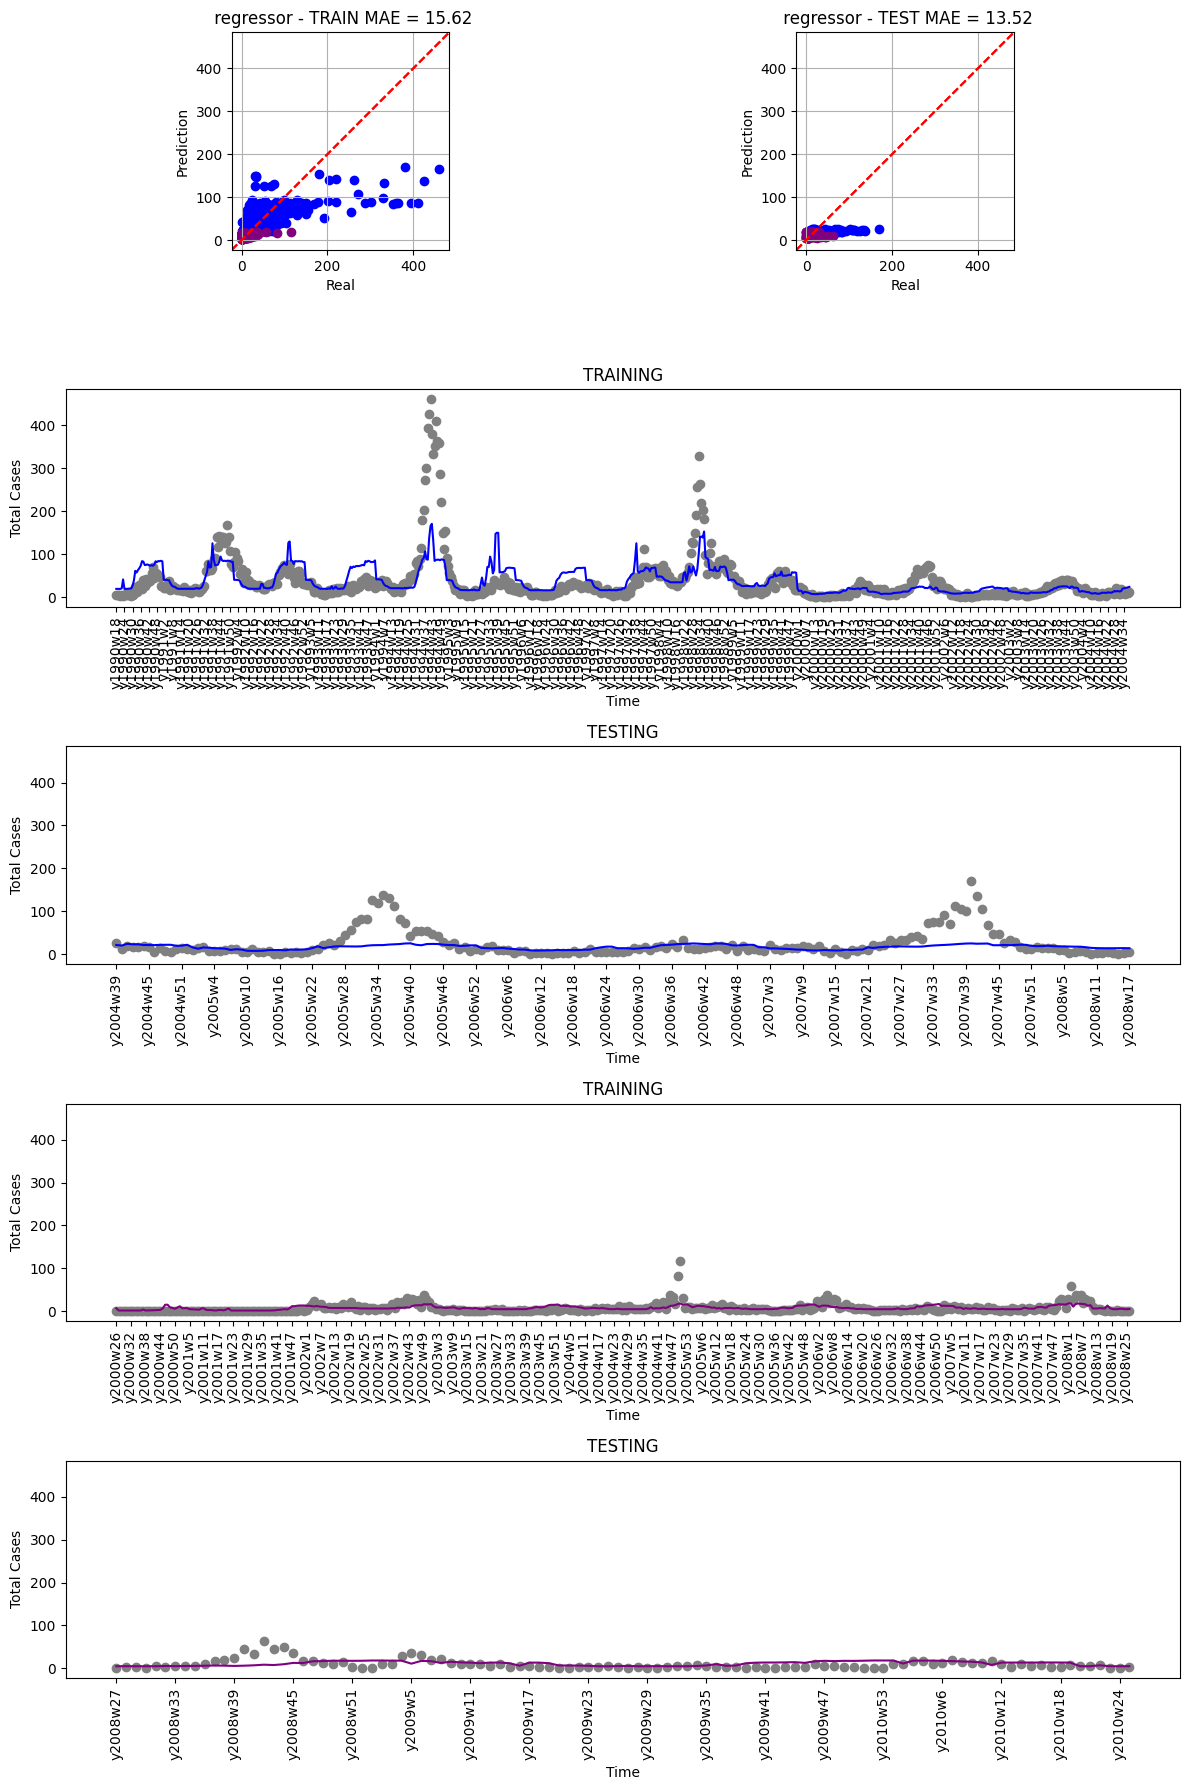

In [18]:

#import packages
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
# from sklearn.neural_network import MLPRegressor

regressors = [
    # Ridge(),
    # ElasticNet(),
    # Lasso(),
    # DecisionTreeRegressor(),
    # ExtraTreeRegressor(),    
    RandomForestRegressor(min_samples_split=100, n_estimators=300, max_depth=5),
    # AdaBoostRegressor(),
    # BaggingRegressor(),
    # LinearSVR(), 
    # HistGradientBoostingRegressor(),
    # KNeighborsRegressor(n_neighbors=4),
    ]

Y_train = trainY.loc[:,'total_cases']
Y_test = testY.loc[:,'total_cases']

pop_sj = 23.50000 # to normalized per 100 000 inhabitants
pop_iq = 5.10000 # to normalized per 100 000 inhabitants
pops = [pop_sj, pop_iq]
cities = ['sj', 'iq']
axes_cit = [[0, 0], [1,0]]
cities_color = ['blue', 'purple']

for regressor in regressors:
    #model pipeline
    print(regressor)
    reg_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)]
    )
    # print(lin_reg_pipe)
    
    reg_pipe.fit(trainX.loc[:,data_select_col], Y_train)
    y_pred = reg_pipe.predict(testX.loc[:,data_select_col])
    y_train_pred = reg_pipe.predict(trainX.loc[:,data_select_col])
    # print('Mean Abs Percentage error = ', mean_absolute_percentage_error(y_test, y_pred))
    print(f'TRAIN - MAE =  {mean_absolute_error(Y_train, y_train_pred)}')
    print(f'TEST - MAE =  {mean_absolute_error(Y_test, y_pred)}')
    # print('TEST - Explained Variance = %.3f' % explained_variance_score(testY, y_pred))
    # print('Rˆ2 = ' ,r2_score(y_test, y_pred))
    # ct.fit_transform(ce_target.fit_transform(X_train, y_train), y_train)

    fig = plt.subplots(figsize=(12,18))
    
    for ct in range(len(cities)):
            
        #train
        city_data_log_train = trainY.loc[:,'city']==cities[ct]
        year_train = trainY.loc[city_data_log_train,'year']
        week_train = trainY.loc[city_data_log_train,'weekofyear']
        # print(zip(np.array(year), np.array(week)))
        time_train=[f'y{y}w{w}' for y, w in zip(np.array(year_train), np.array(week_train))]

        #test
        city_data_log = testY.loc[:,'city']==cities[ct]
        year_test = testY.loc[city_data_log,'year']
        week_test = testY.loc[city_data_log,'weekofyear']
        # print(zip(np.array(year), np.array(week)))
        time_test=[f'y{y}w{w}' for y, w in zip(np.array(year_test), np.array(week_test))]

        # real Y versus prediction Y on TRAIN X
        ax_1_t = plt.subplot(5,2,1)
        ax_1_t.scatter(
            Y_train[city_data_log_train], y_train_pred[city_data_log_train], 
            marker='o', 
            color=cities_color[ct])
        ax_1 = plt.subplot(5,1,2+ct*2)
        ax_1.scatter(time_train, np.array(Y_train[city_data_log_train]), marker='o',color='grey')
        ax_1.plot(time_train, y_train_pred[city_data_log_train], color=cities_color[ct])
        ax_1.set_ylabel('Total Cases')
        ax_1.set_xlabel('Time')
        ax_1.set_title('TRAINING')
        x_ti = [time_train[l] for l in range(0,len(time_train),6)]
        ax_1.set_xticks(x_ti) 
        ax_1.set_xticklabels(x_ti,
            rotation='vertical')
            
        # real Y versus prediction Y on TEST X
        ax_1_tt = plt.subplot(5,2,2)
        ax_1_tt.scatter(
            Y_test[city_data_log], y_pred[city_data_log], 
            marker='o', 
            color=cities_color[ct])

        ax_2 = plt.subplot(5,1,3+ct*2)
        ax_2.scatter(time_test, np.array(Y_test[city_data_log]), marker='o',color='grey')
        ax_2.plot(time_test, y_pred[city_data_log], color=cities_color[ct])
        ax_2.set_ylabel('Total Cases')
        ax_2.set_xlabel('Time')
        ax_2.set_title('TESTING')
        x_ti = [time_test[l] for l in range(0,len(time_test),6)]
        ax_2.set_xticks(x_ti) 
        ax_2.set_xticklabels(x_ti,
            rotation='vertical')
        # ax1[1+ct].xticks(rotation='vertical')
  


    axlims = []
    [axlims.append(a) for a in ax_1_t.get_xlim()];
    [axlims.append(a) for a in ax_1_t.get_ylim()];
    [axlims.append(a) for a in ax_1_tt.get_xlim()];
    [axlims.append(a) for a in ax_1_tt.get_ylim()];

    ax_1_t.set_xlim(min(axlims), max(axlims))
    ax_1_t.set_ylim(min(axlims), max(axlims))
    line = [[min(axlims), min(axlims)],
        [max(axlims), max(axlims)]]
    ax_1_t.plot(line, line, linestyle='--', color='red')
    ax_1_t.grid(True)
    ax_1_t.set_aspect('equal')
    ax_1_t.set_ylabel('Prediction')
    ax_1_t.set_xlabel('Real')
    title = (f' regressor - TRAIN MAE = %.2f' % mean_absolute_error(Y_train, y_train_pred))
    ax_1_t.set_title(title)
    ax_1_t.set_ylim(min(axlims), max(axlims))

    ax_1_tt.set_xlim(min(axlims), max(axlims))
    ax_1_tt.set_ylim(min(axlims), max(axlims))
    line = [[min(axlims), min(axlims)],
        [max(axlims), max(axlims)]]
    ax_1_tt.plot(line, line, linestyle='--', color='red')
    ax_1_tt.grid(True)
    ax_1_tt.set_aspect('equal')
    ax_1_tt.set_ylabel('Prediction')
    ax_1_tt.set_xlabel('Real')
    title = (f' regressor - TEST MAE = %.2f' % mean_absolute_error(Y_test, y_pred))
    # print('TEST - Explained Variance = %.3f' % explained_variance_score(y_test, y_pred))
    ax_1_tt.set_title(title)
    ax_1_tt.set_ylim(min(axlims), max(axlims))

    for ct in range(len(cities)):
        ax_1 = plt.subplot(5,1,2+ct*2)
        ax_1.set_ylim(min(axlims), max(axlims))
        ax_2 = plt.subplot(5,1,3+ct*2)
        ax_2.set_ylim(min(axlims), max(axlims))

    plt.tight_layout()
    plt.savefig(f'fit_prediction_vs_real_{regressor}.png', orientation='landscape', transparent=False)
    plt.show()



RandomForestRegressor()
TRAIN - MAE =  3.876497854077253
TEST - MAE =  13.738281786941581


ModuleNotFoundError: No module named 'vizualize_fit'

In [19]:
from visu import vizualize_fit
vizualize_fit(
    trainY,
    y_train_pred,
    y_pred, 
    saving_path="./visual_test.png",
    test_y=testY,
    plot_y_test=True
)

TypeError: vizualize_fit() got an unexpected keyword argument 'saving_path'

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error


def vizualize_fit(
    train_y: pd.DataFrame,
    predict_train: np.array,
    predict_test: np.array,
    test_y: pd.DataFrame = None,
    plot_y_test: bool = False,
    label='City_Model_Version',
    mycolor='red'
):
    # defined targets
    y_train = train_y.loc[:, "total_cases"]
    y_test = test_y.loc[:, "total_cases"]
    
    cities = ["sj", "iq"]
    cities_colors = ["blue", "purple"]
    #train
    # city_data_log_train = trainY.loc[:,'city']==cities[ct]
    year_train = train_y.loc[:,'year']
    week_train = train_y.loc[:,'weekofyear']
    # print(zip(np.array(year), np.array(week)))
    time_train=[f'y{y}w{w}' for y, w in zip(np.array(year_train), np.array(week_train))]

    #test
    # city_data_log = testY.loc[:,'city']==cities[ct]
    year_test = test_y.loc[:,'year']
    week_test = test_y.loc[:,'weekofyear']
    # print(zip(np.array(year), np.array(week)))
    time_test=[f'y{y}w{w}' for y, w in zip(np.array(year_test), np.array(week_test))]
    # print(f'TRAIN - MAE =  {mean_absolute_error(Y_train, predict_train)}')
    # print(f'TEST - MAE =  {mean_absolute_error(Y_test, predict_test)}')

    train_mae = mean_absolute_error(y_train, predict_train)
    test_mae = mean_absolute_error(y_test, predict_test)

    fig, axs = plt.subplots(figsize=(10, 5), ncols=2)

    real_vs_predict(y_train, predict_train, data_type="Train", mae=train_mae, ax=axs[0], mycolor=mycolor)
    real_vs_predict(y_test, predict_test, data_type="Test", mae=test_mae, ax=axs[1], mycolor=mycolor)
    plt.tight_layout()
    fig.savefig(f'Correlation_Real_Prediction_{label}')

    fig, axs = plt.subplots(figsize=(10, 12), nrows=2)
    #ploting real and predicted as a fucntio of time - train set
    compare_real_pred(
        y_train, 
        predict_train, 
        axs[0], 
        time_train, 
        color=mycolor, 
        label='Training Set'
    )
    #ploting real and predicted as a fucntio of time - test set
    compare_real_pred(
        y_test, 
        predict_test, 
        axs[1], 
        time_test, 
        color=mycolor, 
        label='Test Set'
    )
    plt.tight_layout()
    fig.savefig(f'Comparison_Real_Prediction_{label}')
   
##
def real_vs_predict(
    y_true: pd.Series, y_pred: np.array, data_type: str, mae: float, ax: plt.axes, mycolor='purple'
):
    ax.scatter(y_true, y_pred, marker="o", color=mycolor)
    max_value = max(max(y_true), max(y_pred))
    min_value = min(min(y_true), min(y_pred))
    ax.set_xlim(min_value, max_value)
    ax.set_ylim(min_value, max_value)
    line = [[min_value, min_value], [max_value, max_value]]

    ax.plot(line, line, linestyle="--", color="red")
    ax.grid(False)
    ax.set_aspect("equal")
    ax.set_xlabel(f"{data_type} Real")
    ax.set_ylabel(f"{data_type} Prediction")

##  
def compare_real_pred(
    y_true, 
    y_pred, 
    ax,
    x_val=[],
    color='black',
    label=''
):
    
    ax.scatter(x_val, y_true, marker='o',color='grey')
    ax.plot(x_val, y_pred, color=color)
    ax.set_ylabel('Total Cases')
    ax.set_xlabel('Time')
    ax.set_title(label)
    x_ti = [x_val[l] for l in range(0,len(x_val),20)]
    ax.set_xticks(x_ti)
    ax.set_xticklabels(x_ti,rotation='vertical')
    ax.autoscale(enable=True, axis='both', tight=True)


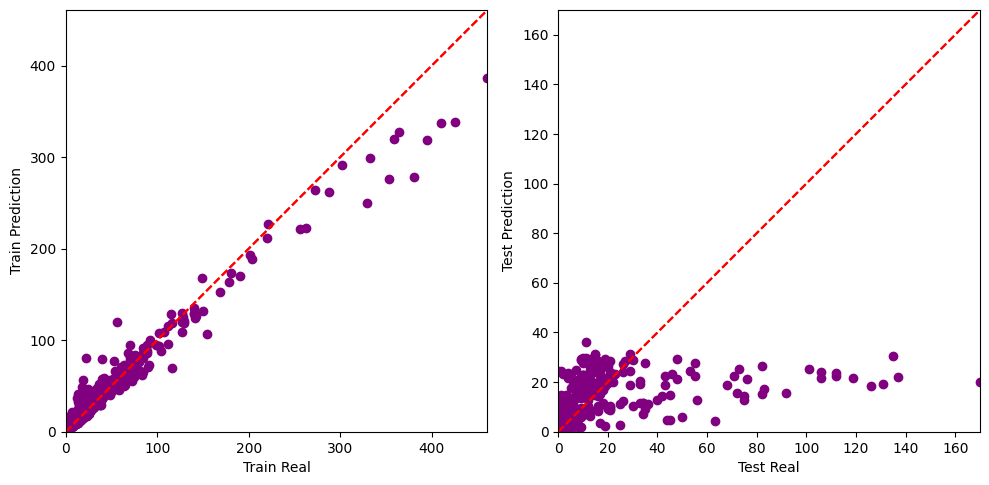

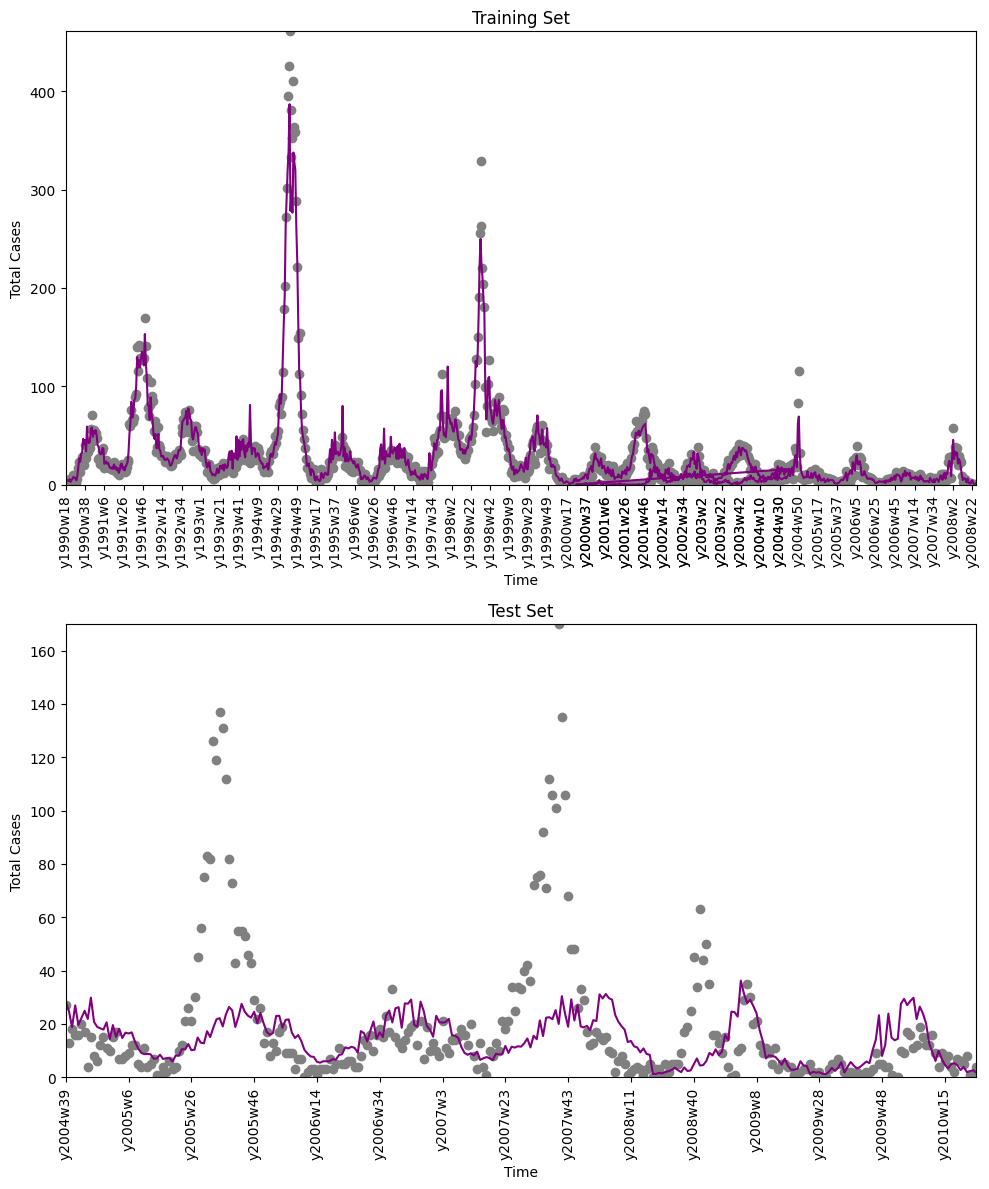

In [78]:
vizualize_fit(
    trainY,
    y_train_pred,
    y_pred, 
    test_y=testY,
    plot_y_test=True,
    label='City_Model_Version',
    mycolor = 'purple'
)

In [110]:
import pandas as pd

def average_columns_and_drop(df, columns):
    print(df.loc[:, columns])
    print(df.loc[:, columns].mean(axis=1))
    return "bou"



offical_trainX = pd.read_csv("./data/dengue_features_train.csv")
offical_trainY = pd.read_csv("./data/dengue_labels_train.csv")
df = offical_trainX
average_columns_and_drop(df, ["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw"])




       ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw
0     0.122600  0.103725  0.198483  0.177617
1     0.169900  0.142175  0.162357  0.155486
2     0.032250  0.172967  0.157200  0.170843
3     0.128633  0.245067  0.227557  0.235886
4     0.196200  0.262200  0.251200  0.247340
...        ...       ...       ...       ...
1451  0.342750  0.318900  0.256343  0.292514
1452  0.160157  0.160371  0.136043  0.225657
1453  0.247057  0.146057  0.250357  0.233714
1454  0.333914  0.245771  0.278886  0.325486
1455  0.298186  0.232971  0.274214  0.315757

[1456 rows x 4 columns]
0       0.150606
1       0.157479
2       0.133315
3       0.209286
4       0.239235
          ...   
1451    0.302627
1452    0.170557
1453    0.219296
1454    0.296014
1455    0.280282
Length: 1456, dtype: float64


'bou'

In [116]:
import pandas as pd

#
def average_columns_and_drop(df, columns):
    print(df.loc[:, columns].mean(axis=1))


#
def convert_kelvins_to_celcius(df, column):
    kelvin_to_degrees = -272.15
    df.rename(columns={column: f'{col[:-2]}_c'})
    df.loc[:, column] = df.loc[:, column]+kelvin_to_degrees
    return df


# import data
offical_trainX = pd.read_csv("./data/dengue_features_train.csv")
offical_trainY = pd.read_csv("./data/dengue_labels_train.csv")
df = offical_trainX

# kelvin to degree

col_from_kelvin_to_celcius = [
    "reanalysis_air_temp_k",
    "reanalysis_avg_temp_k",
    "reanalysis_dew_point_temp_k",
    "reanalysis_max_air_temp_k",
    "reanalysis_min_air_temp_k"]

for col in col_from_kelvin_to_celcius:
    df = convert_kelvins_to_celcius(df, col)
    # print(f'{col[:-2]}_c')

# combined groups into mean
groups_to_combined = [
    ["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw"],
    ["precipitation_amt_mm", "reanalysis_sat_precip_amt_mm", "station_precip_mm"], 
    ["station_max_temp_c", "reanalysis_max_air_temp_k"], 
    ["station_min_temp_c", "reanalysis_min_air_temp_k"], 


]
for col in groups_to_combined:
    average_columns_and_drop(df, col)

data_select_col = ['city', 'year', 'weekofyear', 'week_start_date',  'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']


0       0.150606
1       0.157479
2       0.133315
3       0.209286
4       0.239235
          ...   
1451    0.302627
1452    0.170557
1453    0.219296
1454    0.296014
1455    0.280282
Length: 1456, dtype: float64


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,25.422857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,26.061429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,26.631429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,26.837143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,27.368571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [129]:
def rolling_dataframe_baby(df, n=2):
    df_rolled = df.rolling(n).mean()
    df_rolled.loc[:,'year'] = df.loc[:,'year']
    df_rolled.loc[:,'weekofyear'] = df.loc[:,'weekofyear']
    return df_rolled

offical_trainX = pd.read_csv("./data/dengue_features_train.csv")
offical_trainY = pd.read_csv("./data/dengue_labels_train.csv")

df = offical_trainX

offical_trainX_rolled = rolling_dataframe_baby(df, n=2)
offical_trainX_rolled.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990,19,0.146250,0.122950,0.180420,0.166551,17.62,297.892143,298.092857,293.182857,...,24.97,75.367143,17.62,14.692857,2.500000,26.078571,6.635714,30.55,21.10,12.3
2,1990,20,0.101075,0.157571,0.159779,0.163164,28.68,298.496429,298.660714,294.692857,...,22.02,79.710714,28.68,16.110714,2.335714,26.714286,6.428571,31.95,22.50,25.0
3,1990,21,0.080442,0.209017,0.192379,0.203364,24.95,298.884286,299.053571,295.372143,...,20.00,81.195000,24.95,16.760714,2.364286,27.092857,6.628571,32.75,23.05,22.7
4,1990,22,0.162417,0.253633,0.239379,0.241613,11.44,299.252857,299.446429,295.565714,...,13.05,80.398571,11.44,16.941429,2.721429,28.207143,8.071429,34.15,23.60,4.9
